### Last updated 30/07

In [1]:
import matplotlib
import pathlib

import mne
print(mne.__version__)

0.23.0


In [2]:
matplotlib.use('Qt5Agg')

## Reading raw data

In [3]:
#The files we will be loading
#files = ['10_1', '10_2', '12_1', '12_2', '13_1', '13_2', '14_1', '14_2', '15_1', '15_2', '16_1', '16_2', '21_1', '21_2', '22_1', '22_2', '23_1', '23_2', '28_1', '28_2', '31_1', '31_2', '32_1', '32_2', '33_1', '33_2', '34_1', '34_2', '35_1', '35_2', '46_1', '46_2', '47_1', '47_2', '48_1', '48_2', '49_1', '49_2', '50_1', '50_2', '69_1', '69_2', '70_1', '70_2', '71_1', '71_2', '72_1', '72_2']
files = ['10_1', '10_2', '12_1', '12_2', '13_1', '13_2', '28_1', '28_2', '31_1', '31_2', '32_1', '32_2']

print(len(files))

12


In [4]:
# #Paths Sahil
# path = {}
# for f in files:
#     path[f] = '../../EEG original dataset/sub-AB{}/eeg/sub-AB{}_task-gonogo_run-{}_eeg.set'.format(f[0:-2], f[0:-2], f[-1])
    
# path_channels_tsv = '../../data\sub-AB10_eeg_sub-AB10_task-gonogo_run-1_channels.tsv'

In [5]:
#Paths Arush
path = {}
for f in files:
    path[f] = 'data/other subjects set files/sub-AB{}_eeg_sub-AB{}_task-gonogo_run-{}_eeg.set'.format(f[0:-2], f[0:-2], f[-1])
    
path_channels_tsv = 'data/other subjects set files/sub-AB10_eeg_sub-AB10_task-gonogo_run-1_channels.tsv'

In [6]:
#Loading raw data
unclean_raw = {}
for f in files:
    unclean_raw[f] = mne.io.read_raw_eeglab(path[f], eog=(), preload=True, uint16_codec=None, verbose=None)

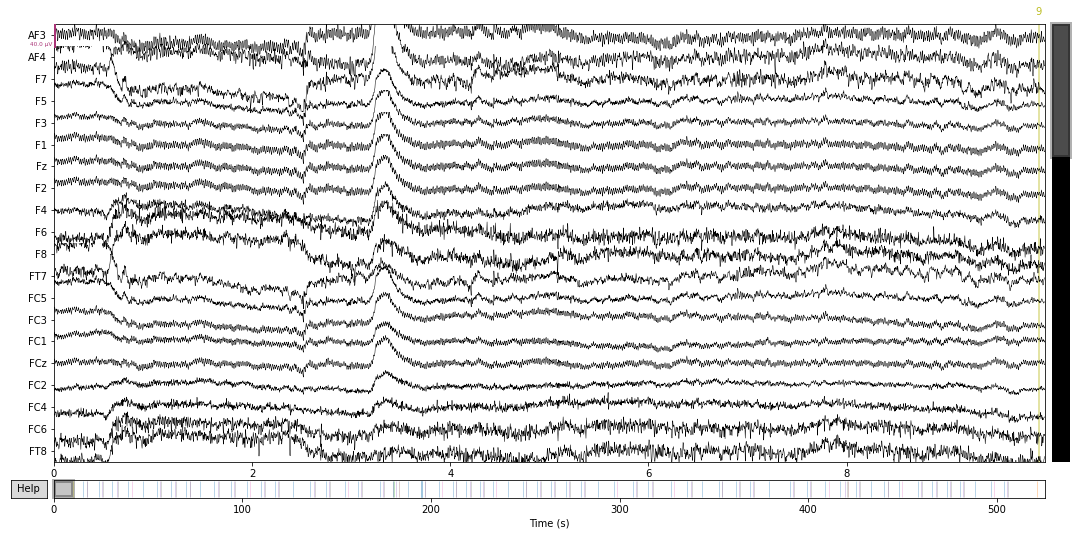

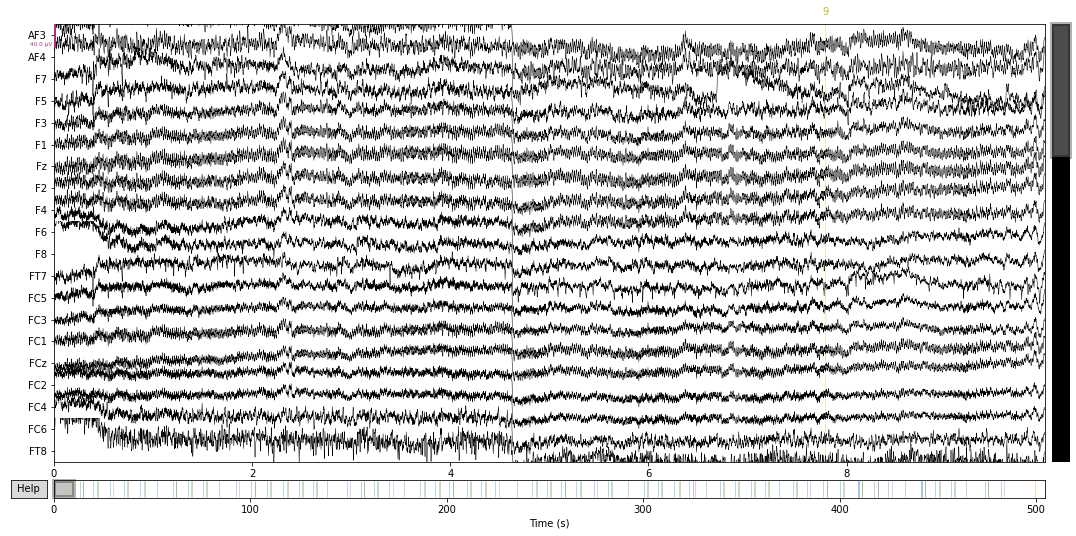

In [91]:
#plotting raw data
# rawab6_1.plot();
# rawab6_2.plot();
unclean_raw['10_1'].plot();
# rawab10_2.plot();
unclean_raw['12_1'].plot();
# rawab12_2.plot();
# rawab13_1.plot();
# rawab13_2.plot();
# rawab28_1.plot();
# rawab28_2.plot();
# rawab31_1.plot();
# rawab31_2.plot();
# rawab32_1.plot();
# rawab32_2.plot();

## Assigning channel types and filtering

In [7]:
#get type of channels from tsv file
import pandas as pd
channel_types_tsv = pd.read_csv(path_channels_tsv, delimiter = '\t')

def get_channel_types_dic(channel_types_tsv):
    channel_types = {}
    for i in range(channel_types_tsv.shape[0]):
        channel_types[channel_types_tsv['name'][i]] = channel_types_tsv['type'][i].lower()
    reassign_dic = {'HEO':'eog', 'VEO':'eog', 'R-Dia-X-(mm)':'misc', 'R-Dia-Y-(mm)':'misc'}
    for k in list(reassign_dic.keys()):
        if k in list(channel_types):
            channel_types[k] = reassign_dic[k]
    return channel_types

channel_types = get_channel_types_dic(channel_types_tsv)
channel_types

{'AF3': 'eeg',
 'AF4': 'eeg',
 'F7': 'eeg',
 'F5': 'eeg',
 'F3': 'eeg',
 'F1': 'eeg',
 'Fz': 'eeg',
 'F2': 'eeg',
 'F4': 'eeg',
 'F6': 'eeg',
 'F8': 'eeg',
 'FT7': 'eeg',
 'FC5': 'eeg',
 'FC3': 'eeg',
 'FC1': 'eeg',
 'FCz': 'eeg',
 'FC2': 'eeg',
 'FC4': 'eeg',
 'FC6': 'eeg',
 'FT8': 'eeg',
 'T7': 'eeg',
 'C5': 'eeg',
 'C3': 'eeg',
 'C1': 'eeg',
 'Cz': 'eeg',
 'C2': 'eeg',
 'C4': 'eeg',
 'C6': 'eeg',
 'T8': 'eeg',
 'M1': 'eeg',
 'TP7': 'eeg',
 'CP5': 'eeg',
 'CP3': 'eeg',
 'CP1': 'eeg',
 'CPz': 'eeg',
 'CP2': 'eeg',
 'CP4': 'eeg',
 'CP6': 'eeg',
 'TP8': 'eeg',
 'M2': 'eeg',
 'P7': 'eeg',
 'P5': 'eeg',
 'P3': 'eeg',
 'P1': 'eeg',
 'Pz': 'eeg',
 'P2': 'eeg',
 'P4': 'eeg',
 'P6': 'eeg',
 'P8': 'eeg',
 'PO7': 'eeg',
 'PO5': 'eeg',
 'PO3': 'eeg',
 'POz': 'eeg',
 'PO4': 'eeg',
 'PO6': 'eeg',
 'PO8': 'eeg',
 'CB1': 'eeg',
 'O1': 'eeg',
 'Oz': 'eeg',
 'O2': 'eeg',
 'CB2': 'eeg',
 'VEO': 'eog',
 'HEO': 'eog',
 'EKG': 'ecg',
 'R-Dia-X-(mm)': 'misc',
 'R-Dia-Y-(mm)': 'misc'}

In [8]:
#assigning channel types
for f in files:
    unclean_raw[f].set_channel_types(channel_types)

# Performing Signal Preprocessing

### Applying Low-Pass filter before applying ICA

In [9]:
#filtering the signals
for f in files:
    unclean_raw[f].filter(0.5, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter p

## Implementing ICA and SSP Projections

In [10]:
#Creating copy
raw = {}
for f in files:
    raw[f] = unclean_raw[f].copy()

In [117]:
#Creating ICA objects
ica = {}
for f in files:
    ica[f] = mne.preprocessing.ICA(n_components = 61, random_state = 42, max_iter = "auto", method = "fastica")

In [106]:
#Fitting ICA objects
for f in files:
    ica[f].fit(raw[f])

D:\anacondainstalled\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
D:\anacondainstalled\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
D:\anacondainstalled\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
D:\anacondainstalled\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
D:\anacondainstalled\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_fastica.py:120: Convergenc

KeyboardInterrupt: 

In [ ]:
#plotting sources and components
ica['10_1'].plot_sources(raw['10_1'])

Creating RawArray with float64 data, n_channels=24, n_times=262640
    Range : 0 ... 262639 =      0.000 ...   525.278 secs
Ready.


<MNEBrowseFigure size 1527.78x766.667 with 4 Axes>

In [ ]:
ica['10_2'].plot_components(outlines = 'head', sphere = 10, ch_type = 'eeg')

[<MNEFigure size 1920x966 with 20 Axes>, <MNEFigure size 195x256 with 1 Axes>]

In [8]:
#To find and mark bad components
def mark_artifacts(ica, raw):
    ica.exclude = []
    ica.detect_artifacts(raw)
    eeg_bads = list(ica.exclude)
    ecg_bads = ica.find_bads_ecg(raw)[0]
    eog_bads = ica.find_bads_eog(raw)[0]
    ica.exclude = list(set(eeg_bads+ecg_bads+eog_bads))

In [9]:
#Marking bad components
# for f in files:
#     mark_artifacts(ica[f], raw[f])

In [ ]:
ica['10_1'].plot_sources(raw['10_1'])

In [ ]:
#Applying ica
for f in files:
    ica[f].apply(raw[f],
#                  exclude = ica[f].exclude,
                )

## plotting Electrode positions

In [ ]:
unclean_raw['12_1'].plot_sensors(ch_type = 'eeg', sphere = 10);
# # rawab12_2.plot_sensors(ch_type = 'eeg', sphere = 10);

In [ ]:
unclean_raw['12_1'].plot_sensors(ch_type = 'eeg', kind = '3d');
# # rawab12_2.plot_sensors(ch_type = 'eeg', kind = '3d');

In [ ]:
# raw['12_1'].plot_sensors(ch_type = 'eeg', sphere = 10);

In [11]:
unclean_raw['10_1']

<RawEEGLAB | sub-AB10_eeg_sub-AB10_task-gonogo_run-1_eeg.set, 66 x 262640 (525.3 s), ~132.3 MB, data loaded>

In [ ]:
unclean_raw['10_1'].plot();

Channels marked as bad: none


In [ ]:
raw['10_1'].plot();

Channels marked as bad: none


In [ ]:
# raw['10_1']

In [10]:
# for f in files:
#     raw[f].filter(0.5, 60)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband 

## Generating Events for all subjects

In [11]:
events = {}
for f in files:
    events[f] = mne.events_from_annotations(raw[f])

Used Annotations descriptions: ['1', '10', '11', '2', '3', '4', '5', '9']
Used Annotations descriptions: ['1', '10', '2', '3', '4', '5', '9']
Used Annotations descriptions: ['1', '10', '2', '4', '5', '6', '7', '9']
Used Annotations descriptions: ['1', '10', '11', '2', '3', '4', '5', '6', '7', '9']
Used Annotations descriptions: ['1', '10', '2', '3', '4', '5', '9']
Used Annotations descriptions: ['1', '10', '11', '2', '4', '5', '6', '7', '9']
Used Annotations descriptions: ['1', '10', '2', '4', '5', '6', '7', '9']
Used Annotations descriptions: ['1', '10', '2', '3', '4', '5', '6', '7', '9']
Used Annotations descriptions: ['1', '10', '2', '3', '4', '5', '9']
Used Annotations descriptions: ['1', '10', '2', '3', '4', '5', '6', '7', '9']
Used Annotations descriptions: ['1', '10', '11', '2', '3', '4', '5', '6', '7', '9']
Used Annotations descriptions: ['1', '10', '2', '4', '5', '6', '7', '9']


In [12]:
events['10_1'][1]

{'1': 1, '10': 2, '11': 3, '2': 4, '3': 5, '4': 6, '5': 7, '9': 8}

In [13]:
events['28_1'][1]

{'1': 1, '10': 2, '2': 3, '4': 4, '5': 5, '6': 6, '7': 7, '9': 8}

In [14]:
#Creating event id Dictionary
event_id = {
    "taskstart" : '9',
    "cue" : "1",
    "go" : "2",
    "button press" : "5",
    "no-go" : "4",
    "task end": "10",
    "error 1" : "3",
    "error 2" : "6",
    "error 3" : "7",
    "error 4" : "8",
    "error 5" : "11"
}
event_id

{'taskstart': '9',
 'cue': '1',
 'go': '2',
 'button press': '5',
 'no-go': '4',
 'task end': '10',
 'error 1': '3',
 'error 2': '6',
 'error 3': '7',
 'error 4': '8',
 'error 5': '11'}

## Creating Epochs

In [15]:
#Creating epochs
epochs = {}
for f in files:
    epochs[f] = mne.Epochs(raw[f],
                   events = events[f][0],
                   event_id = events[f][1],)

Not setting metadata
Not setting metadata
155 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
153 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
154 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
158 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
153 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
156 matching events found
Setting base

In [ ]:
epochs['10_1'].plot();

In [16]:
epochs['10_1'].get_data(picks = 'eeg').shape

Loading data for 155 events and 351 original time points ...
0 bad epochs dropped


(155, 61, 351)

In [18]:
#to fix event ids
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

def get_values_from_keys(d, val):
    return [v for k, v in d.items() if k == val]

# def fix_event_ids(epochs, events):
#     for i in range(epochs.events.shape[0]):
#         epochs.events[i][2] = int(get_values_from_keys(events[1], epochs.events[i][2])[0])

In [17]:
#fix event ids

# for f in files:
#     fix_event_ids(epochs[f], events[f])

In [17]:
epochs

{'10_1': <Epochs |  155 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~92 kB, data not loaded,
  '1': 60
  '10': 1
  '11': 1
  '2': 40
  '3': 2
  '4': 10
  '5': 40
  '9': 1>,
 '10_2': <Epochs |  153 events (good & bad), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~92 kB, data not loaded,
  '1': 60
  '10': 1
  '2': 40
  '3': 1
  '4': 10
  '5': 40
  '9': 1>,
 '12_1': <Epochs |  154 events (good & bad), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~92 kB, data not loaded,
  '1': 60
  '10': 1
  '2': 40
  '4': 10
  '5': 40
  '6': 1
  '7': 1
  '9': 1>,
 '12_2': <Epochs |  158 events (good & bad), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~92 kB, data not loaded,
  '1': 60
  '10': 1
  '11': 1
  '2': 40
  '3': 2
  '4': 10
  '5': 41
  '6': 1
  '7': 1
  '9': 1>,
 '13_1': <Epochs |  153 events (good & bad), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~92 kB, data not loaded,
  '1': 60
  '10': 1
  '2': 40
  '3': 1
  '4': 10
  '5': 40
  '9': 1>,
 '13_2': <Epochs |  156 events (good & bad), -0.2 - 0.5 sec,

## Analysis

In [ ]:
epochs['10_1']['1'].plot_image()

Loading data for 60 events and 351 original time points ...
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


[<Figure size 640x476 with 3 Axes>]

In [18]:
epochs['10_1']

Number of events,155
Events,1: 6010: 111: 12: 403: 24: 105: 409: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [19]:
epochs['10_1']['1']

Number of events,60
Events,1: 60
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [20]:
evoked_101_cue = epochs['10_1']['1'].average()
evoked_101_go = epochs['10_1']['2'].average()
evoked_101_nogo = epochs['10_1']['4'].average()

evoked_102_cue = epochs['10_2']['1'].average()
evoked_102_go = epochs['10_2']['2'].average()
evoked_102_nogo = epochs['10_2']['4'].average()



evoked_121_cue = epochs['12_1']['1'].average()
evoked_121_go = epochs['12_1']['2'].average()
evoked_121_nogo = epochs['12_1']['4'].average()

evoked_122_cue = epochs['12_2']['1'].average()
evoked_122_go = epochs['12_2']['2'].average()
evoked_122_nogo = epochs['12_2']['4'].average()



evoked_131_cue = epochs['13_1']['1'].average()
evoked_131_go = epochs['13_1']['2'].average()
evoked_131_nogo = epochs['13_1']['4'].average()

evoked_132_cue = epochs['13_2']['1'].average()
evoked_132_go = epochs['13_2']['2'].average()
evoked_132_nogo = epochs['13_2']['4'].average()



evoked_281_cue = epochs['28_1']['1'].average()
evoked_281_go = epochs['28_1']['2'].average()
evoked_281_nogo = epochs['28_1']['4'].average()

evoked_282_cue = epochs['28_2']['1'].average()
evoked_282_go = epochs['28_2']['2'].average()
evoked_282_nogo = epochs['28_2']['4'].average()

evoked_311_cue = epochs['31_1']['1'].average()
evoked_311_go = epochs['31_1']['2'].average()
evoked_311_nogo = epochs['31_1']['4'].average()

evoked_312_cue = epochs['31_2']['1'].average()
evoked_312_go = epochs['31_2']['2'].average()
evoked_312_nogo = epochs['31_2']['4'].average()


evoked_321_cue = epochs['32_1']['1'].average()
evoked_321_go = epochs['32_1']['2'].average()
evoked_321_nogo = epochs['32_1']['4'].average()

evoked_322_cue = epochs['32_2']['1'].average()
evoked_322_go = epochs['32_2']['2'].average()
evoked_322_nogo = epochs['32_2']['4'].average()

In [21]:
epochs['28_1']

Number of events,154
Events,1: 6010: 12: 404: 105: 406: 17: 19: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [22]:
epochs['10_1']

Number of events,155
Events,1: 6010: 111: 12: 403: 24: 105: 409: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [ ]:
evoked_101_cue.plot(spatial_colors=True)
evoked_102_cue.plot(spatial_colors=True)

evoked_101_go.plot(spatial_colors=True)
evoked_102_go.plot(spatial_colors=True)

evoked_101_nogo.plot(spatial_colors=True)
evoked_102_nogo.plot(spatial_colors=True)

<Figure size 640x296 with 2 Axes>

## Multivariate Statistics

In [23]:
%matplotlib qt

In [24]:
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import mne

In [25]:
matplotlib.use('Qt5Agg')
mne.set_log_level('warning')

In [137]:
# epochs_101 = epochs['10_1']

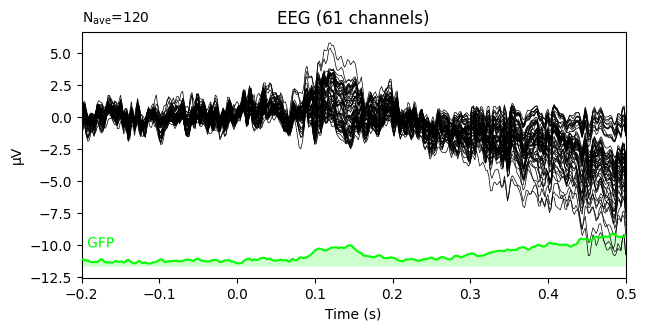

In [138]:
evoked_CUE = mne.combine_evoked([
    evoked_101_cue,
    evoked_102_cue, 
    evoked_121_cue,
    evoked_122_cue,
    evoked_131_cue,
    evoked_132_cue,
    evoked_281_cue,
    evoked_282_cue,
    evoked_311_cue,
    evoked_312_cue,
    evoked_321_cue,
    evoked_322_cue,
    ], weights = 'equal')

evoked_GO = mne.combine_evoked([
    evoked_101_go,
    evoked_102_go, 
    evoked_121_go,
    evoked_122_go,
    evoked_131_go,
    evoked_132_go,
    evoked_281_go,
    evoked_282_go,
    evoked_311_go,
    evoked_312_go,
    evoked_321_go,
    evoked_322_go,
    ], weights = 'equal')

evoked_NOGO = mne.combine_evoked([
    evoked_101_nogo,
    evoked_102_nogo, 
    evoked_121_nogo,
    evoked_122_nogo,
    evoked_131_nogo,
    evoked_132_nogo,
    evoked_281_nogo,
    evoked_282_nogo,
    evoked_311_nogo,
    evoked_312_nogo,
    evoked_321_nogo,
    evoked_322_nogo,
    ], weights = 'equal')


evoked_CUE.plot(gfp = True)
evoked_GO.plot(gfp = True)
evoked_NOGO.plot(gfp = True)
# mne.viz.plot_compare_evokeds(
#     [
#         evoked_101_cue,
#         evoked_101_go,
#         evoked_diff
#     ]
# )

In [ ]:
mne.viz.plot_compare_evokeds(
    [
        evoked_CUE,
        evoked_GO,
        evoked_NOGO
    ],
    legend=True
)

[<Figure size 800x600 with 1 Axes>]

In [26]:
diff_evoked_CUEGO = mne.combine_evoked([evoked_CUE, evoked_GO], weights=[1, -1])
diff_evoked_CUENOGO = mne.combine_evoked([evoked_CUE, evoked_NOGO], weights=[1, -1])
diff_evoked_GONOGO = mne.combine_evoked([evoked_GO, evoked_NOGO], weights=[1, -1])

NameError: name 'evoked_CUE' is not defined

In [ ]:
mne.viz.plot_compare_evokeds(
    [
        evoked_CUE,
        evoked_GO,
        diff_evoked_CUEGO
    ],
    legend=True
)

[<Figure size 800x600 with 1 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(
    [
        evoked_GO,
        evoked_NOGO,
        diff_evoked_CUENOGO
    ],
    legend=True
)

[<Figure size 800x600 with 1 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(
    [
        evoked_GO,
        evoked_NOGO,
        diff_evoked_GONOGO
    ],
    legend=True
)

[<Figure size 800x600 with 1 Axes>]

# Frequency and Time-Frequency sensors Analysis

In [27]:
import pathlib
import matplotlib

import mne
import mne_bids

matplotlib.use('Qt5Agg')
mne.set_log_level('warning')

In [28]:
epochs['10_1'].apply_proj()

Number of events,155
Events,1: 6010: 111: 12: 403: 24: 105: 409: 1
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [29]:
epochs['10_1'].info

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, FC5, FC3, ...
 chs: 61 EEG, 2 EOG, 1 ECG, 2 MISC
 custom_ref_applied: False
 dig: 66 items (66 EEG)
 highpass: 0.5 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

### Frequency Analysis

# Applying Machine learning for classification

In [30]:
#Loading important libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Preparing data

In [31]:
#Getting epoch data
datadic = {}
for f in files:
    datadic[f] = epochs[f].get_data(picks = 'eeg')

In [32]:
# epochs['10_1'].plot()

In [33]:
#Concatenating data
data = np.concatenate(list(datadic.values()), 
                      axis = 0)
print(data.shape)

#Changing the shape of data from (events, channel, time points) to (events, time points, channel)
datars = np.zeros((data.shape[0], data.shape[2], data.shape[1]))
for i in range(datars.shape[0]):
    datars[i] = np.transpose(data[i])
    
dims_lstm_1 = datars.shape[1]
dims_lstm_2 = datars.shape[2]
print(dims_lstm_1, "X", dims_lstm_2)
datars.shape

(1875, 61, 351)
351 X 61


(1875, 351, 61)

In [34]:
n_trials = data.shape[0]


data = data.reshape(n_trials, -1)
print(data.shape)
dims_ip = data.shape[1]
dims_ip

(1875, 21411)


21411

In [35]:
#Getting y
ydic = {}
for f in files:
    ydic[f] = epochs[f].events[:, 2]
y = np.concatenate(list(ydic.values()), axis = 0)

In [36]:
#Preparing main dataset
y = y.reshape(-1, 1)
# y = y[...,np.newaxis]
datarscopy = datars.copy()
datarscopy = datarscopy.reshape(datars.shape[0], -1)

print(datars.shape)
print(y.shape)
main_dataset = np.concatenate((datarscopy, y), axis = 1)
print(main_dataset.shape)

#Defining main x and y for training
main_x = main_dataset[:, :-1]
main_y = main_dataset[:, -1]
print(main_x.shape)
print(main_y.shape)

(1875, 351, 61)
(1875, 1)
(1875, 21412)
(1875, 21411)
(1875,)


In [36]:
# Clearing memory
del unclean_raw
del raw
del ica
del events
del epochs

NameError: name 'ica' is not defined

## Classfying go/no/cue/button press

In [37]:
#Removing events which are not needed for current task
dataset = main_dataset.copy()
print(dataset.shape)
dataset = dataset[dataset[:, -1]!=9]
dataset = dataset[dataset[:, -1]!=10]

dataset = dataset[dataset[:, -1]!=3]
dataset = dataset[dataset[:, -1]!=6]
dataset = dataset[dataset[:, -1]!=7]
dataset = dataset[dataset[:, -1]!=8]
dataset = dataset[dataset[:, -1]!=11]

print(dataset.shape)

#Defining x and y
x = dataset[:, :-1]
y = dataset[:, -1]
print(x.shape)
print(y.shape)
print(list(set(y)))

permutations = np.random.permutation(len(x))
# print(permutation)
print(x[-1])
x = x[permutations]
y = y[permutations]
print(x[-1])

xmlp = x.copy()
ymlp = y.copy()

xlstm = x.copy().reshape((-1, dims_lstm_1, dims_lstm_2))
ylstm = y.copy()

xcnn = x.copy().reshape((-1, dims_lstm_1, dims_lstm_2))
ycnn = y.copy()

(1875, 21412)
(1123, 21412)
(1123, 21411)
(1123,)
[1.0, 2.0, 4.0, 5.0]
[-1.36049910e-05 -1.44154366e-05 -8.69092783e-06 ... -2.58918331e-06
 -2.30705942e-06 -2.82092341e-06]
[8.13964322e-06 9.00199150e-06 5.22231648e-06 ... 4.94349155e-06
 4.30196019e-06 4.03077085e-06]


In [38]:
#Encoding y
dict = {1.0: 0,2.0: 1, 4.0: 2, 5.0: 3}

for i in range(len(y)):
    y[i] = dict[y[i]]
    ylstm[i] = dict[ylstm[i]]

print(list(set(y)))

[0.0, 1.0, 2.0, 3.0]


In [39]:
num_classes = 4
y = tf.keras.utils.to_categorical(y, num_classes)
ymlp = y.copy()
ylstm = y.copy()
ycnn = y.copy()
# yab10_1[0]
print(y[:5])

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [65]:
train_test_split = int(0.8 * len(xmlp))
print(train_test_split)

x_train_mlp = xmlp[:train_test_split]
y_train_mlp = ymlp[:train_test_split]

x_test_mlp = xmlp[train_test_split:]
y_test_mlp = ymlp[train_test_split:]

# x_mlp_train = xmlp[:]

898


In [66]:
def get_cyclic_generator(features, labels, batch_size = 1):
  while True:
    for n in range(features.shape[0]//batch_size):
      yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = labels[permuted]

In [67]:
train_batch_size = 32
train_cyclic_generator_mlp = get_cyclic_generator(x_train_mlp, y_train_mlp, batch_size = train_batch_size)
# test_cyclic_generator_mlp = get_cyclic_generator(x_test_mlp, y_test_mlp, batch_size = train_batch_size)

### Training on MLP Model

In [68]:
#Creating model architecture
inp_shape = (dims_ip, )
ip = tf.keras.Input(shape = inp_shape)
dense1 = tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_initializer = 'random_normal')(ip)
drop = tf.keras.layers.Dropout(.4)(dense1)
dense2 = tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer = 'random_normal')(drop)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
out = tf.keras.layers.Dense(num_classes, activation = 'softmax')(drop2)

mlp = tf.keras.Model(inputs = ip, outputs = out)
mlp.summary()
# inp_shape = (None, )
# review_sequence = tf.keras.Input(shape = inp_shape)
# embedding_sequence = tf.keras.layers.Embedding(input_dim=100+1, output_dim=32, input_shape=(review_sequence.shape), mask_zero=False)(review_sequence)
# average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
# positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

# model = tf.keras.Model(inputs = review_sequence, outputs = positive_probability)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 21411)]           0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                685184    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 68        
Total params: 685,780
Trainable params: 685,780
Non-trainable params: 0
_____________________________________________________

In [69]:
# Compiling the model
mlp_earlystop = EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_acc')

path = 'mlp_checkpoint/checkpoint_{epoch:02d}';
mlp_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

mlp.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [70]:
mlp_history = mlp.fit(x_train_mlp, y_train_mlp,
#                         validation_data = test_cyclic_generator_mlp,
                      validation_data = (x_test_mlp, y_test_mlp),
#                       steps_per_epoch= 449,
                      epochs = 100,
                      batch_size = 32,
                      shuffle = True
#                       callbacks = [mlp_earlystop, mlp_checkpoint],
                     ) #Fitting the model

Train on 898 samples, validate on 225 samples
Epoch 1/100
898/898 [==============================] - 2s 2ms/sample - loss: 1.3572 - acc: 0.6448 - val_loss: 1.3284 - val_acc: 0.6044
Epoch 2/100
898/898 [==============================] - 1s 2ms/sample - loss: 1.2794 - acc: 0.6503 - val_loss: 1.2439 - val_acc: 0.6044
Epoch 3/100
898/898 [==============================] - 2s 2ms/sample - loss: 1.1724 - acc: 0.6503 - val_loss: 1.1441 - val_acc: 0.6044
Epoch 4/100
898/898 [==============================] - 1s 2ms/sample - loss: 1.0863 - acc: 0.6503 - val_loss: 1.0832 - val_acc: 0.6044
Epoch 5/100
898/898 [==============================] - 1s 2ms/sample - loss: 1.0441 - acc: 0.6503 - val_loss: 1.0584 - val_acc: 0.6044
Epoch 6/100
898/898 [==============================] - 1s 1ms/sample - loss: 1.0041 - acc: 0.6503 - val_loss: 1.0493 - val_acc: 0.6044
Epoch 7/100
898/898 [==============================] - 1s 2ms/sample - loss: 0.9977 - acc: 0.6503 - val_loss: 1.0428 - val_acc: 0.6044
Epoch 8/1

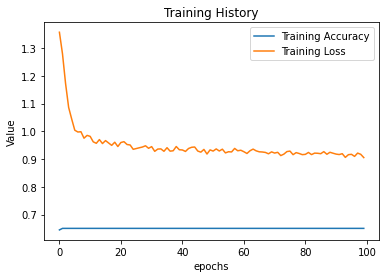

Initial training accuracy is:  0.64476615
Final training accuracy is:  0.65033406
Initial training loss is:  1.3572006753930004
Final training loss is:  0.9054617494145587


In [71]:
#Plotting model history
plt.plot(mlp_history.history['acc'])
plt.plot(mlp_history.history['loss'])
plt.legend(['Training Accuracy', 'Training Loss'])
plt.title('Training History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial training accuracy is: ", mlp_history.history['acc'][0])
print("Final training accuracy is: ", mlp_history.history['acc'][-1])

print("Initial training loss is: ", mlp_history.history['loss'][0])
print("Final training loss is: ", mlp_history.history['loss'][-1])

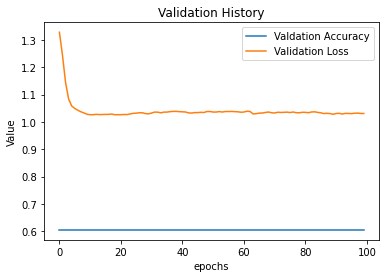

Initial validation accuracy is:  0.60444444
Final validation accuracy is:  0.60444444
Initial validation loss is:  1.328415658738878
Final validation loss is:  1.0308793210983276


In [72]:
#Plotting model history
plt.plot(mlp_history.history['val_acc'])
plt.plot(mlp_history.history['val_loss'])
plt.legend(['Valdation Accuracy', 'Validation Loss'])
plt.title('Validation History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial validation accuracy is: ", mlp_history.history['val_acc'][0])
print("Final validation accuracy is: ", mlp_history.history['val_acc'][-1])

print("Initial validation loss is: ", mlp_history.history['val_loss'][0])
print("Final validation loss is: ", mlp_history.history['val_loss'][-1])

## Training on LSTM model

In [73]:
train_test_split = int(0.8 * len(xlstm))
print(train_test_split)

x_train_lstm = xlstm[:train_test_split]
y_train_lstm = ylstm[:train_test_split]

x_test_lstm = xlstm[train_test_split:]
y_test_lstm = ylstm[train_test_split:]

898


In [74]:
def get_cyclic_generator(features, labels, batch_size = 1):
  while True:
    for n in range(features.shape[0]//batch_size):
      yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = labels[permuted]

In [75]:
train_batch_size = 32
train_cyclic_generator_lstm = get_cyclic_generator(x_train_lstm, y_train_lstm, batch_size = train_batch_size)
# test_cyclic_generator = get_cyclic_generator(x_test, y_test, batch_size = train_batch_size)

In [79]:
#Creating model architecture
inp_shape = (dims_lstm_1, dims_lstm_2)
ip = tf.keras.Input(shape = inp_shape)
lstm = tf.keras.layers.LSTM(32, return_sequences=True)(ip)
# drop = tf.keras.layers.Dropout(.4)(lstm)
# lstm = tf.keras.layers.LSTM(16, return_sequences=True)(ip)
# drop = tf.keras.layers.Dropout(.4)(lstm)
flatten = tf.keras.layers.Flatten()(lstm)
dense1 = tf.keras.layers.Dense(units = 32, kernel_initializer = 'random_normal')(flatten)
leakyRelu = tf.keras.layers.LeakyReLU()(dense1)
drop1 = tf.keras.layers.Dropout(.4)(leakyRelu)
dense2 = tf.keras.layers.Dense(units = 16, kernel_initializer = 'random_normal')(drop1)
leakyRelu2 = tf.keras.layers.LeakyReLU()(dense2)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
out = tf.keras.layers.Dense(num_classes, activation = 'softmax')(drop2)

lstm = tf.keras.Model(inputs = ip, outputs = out)
lstm.summary()
# inp_shape = (None, )
# review_sequence = tf.keras.Input(shape = inp_shape)
# embedding_sequence = tf.keras.layers.Embedding(input_dim=100+1, output_dim=32, input_shape=(review_sequence.shape), mask_zero=False)(review_sequence)
# average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
# positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

# model = tf.keras.Model(inputs = review_sequence, outputs = positive_probability)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 351, 61)]         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 351, 32)           12032     
_________________________________________________________________
flatten_4 (Flatten)          (None, 11232)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                359456    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528 

In [80]:
# Compiling the model
lstm_earlystop = EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_acc')

path = 'lstm_checkpoint/checkpoint_{epoch:02d}';
lstm_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

lstm.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [81]:
lstm_history = lstm.fit(x_train_lstm, y_train_lstm,
                        validation_data = (x_test_lstm, y_test_lstm),
#                         steps_per_epoch= 449,
                        epochs = 100,
                        batch_size = 32,
                        callbacks = [lstm_checkpoint]) #Fitting the model

Train on 898 samples, validate on 225 samples
Epoch 1/100
896/898 [============================>.] - ETA: 0s - loss: 1.0844 - acc: 0.6183
Epoch 00001: val_acc improved from -inf to 0.60444, saving model to lstm_checkpoint/checkpoint_01
898/898 [==============================] - 8s 9ms/sample - loss: 1.0844 - acc: 0.6180 - val_loss: 1.0324 - val_acc: 0.6044
Epoch 2/100
896/898 [============================>.] - ETA: 0s - loss: 0.9764 - acc: 0.6384
Epoch 00002: val_acc did not improve from 0.60444
898/898 [==============================] - 5s 6ms/sample - loss: 0.9766 - acc: 0.6381 - val_loss: 1.0340 - val_acc: 0.6044
Epoch 3/100
896/898 [============================>.] - ETA: 0s - loss: 0.9699 - acc: 0.6429
Epoch 00003: val_acc did not improve from 0.60444
898/898 [==============================] - 4s 4ms/sample - loss: 0.9684 - acc: 0.6437 - val_loss: 1.0433 - val_acc: 0.6044
Epoch 4/100
896/898 [============================>.] - ETA: 0s - loss: 0.9778 - acc: 0.6440
Epoch 00004: val_ac

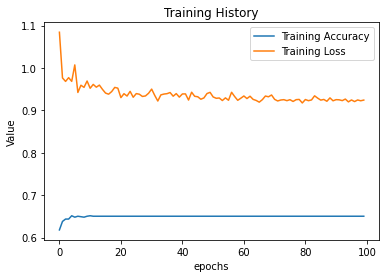

Initial training accuracy is:  0.6180401
Final training accuracy is:  0.65033406
Initial training loss is:  1.0844334687846806
Final training loss is:  0.9243905087621812


In [82]:
#Plotting model history
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['loss'])
plt.legend(['Training Accuracy', 'Training Loss'])
plt.title('Training History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial training accuracy is: ", lstm_history.history['acc'][0])
print("Final training accuracy is: ", lstm_history.history['acc'][-1])

print("Initial training loss is: ", lstm_history.history['loss'][0])
print("Final training loss is: ", lstm_history.history['loss'][-1])

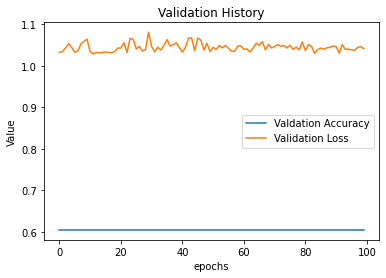

Initial Validation accuracy is:  0.60444444
Final Validation accuracy is:  0.60444444
Initial Validation loss is:  1.0323702801598442
Final Validation loss is:  1.0413138622707792


In [83]:
#Plotting model history
plt.plot(lstm_history.history['val_acc'])
plt.plot(lstm_history.history['val_loss'])
plt.legend(['Valdation Accuracy', 'Validation Loss'])
plt.title('Validation History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial Validation accuracy is: ", lstm_history.history['val_acc'][0])
print("Final Validation accuracy is: ", lstm_history.history['val_acc'][-1])

print("Initial Validation loss is: ", lstm_history.history['val_loss'][0])
print("Final Validation loss is: ", lstm_history.history['val_loss'][-1])

### Training on CNN Model

In [84]:
train_test_split = int(0.8 * len(xcnn))
print(train_test_split)

x_train_cnn = xcnn[:train_test_split]
y_train_cnn = ycnn[:train_test_split]

x_test_cnn = xcnn[train_test_split:]
y_test_cnn = ycnn[train_test_split:]

898


In [85]:
def get_cyclic_generator(features, labels, batch_size = 1):
  while True:
    for n in range(features.shape[0]//batch_size):
      yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = labels[permuted]

In [86]:
train_batch_size = 32
train_cyclic_generator_cnn = get_cyclic_generator(x_train_cnn, y_train_cnn, batch_size = train_batch_size)
# test_cyclic_generator = get_cyclic_generator(x_test, y_test, batch_size = train_batch_size)

In [87]:
inp_shape = (dims_lstm_1, dims_lstm_2)
ip = tf.keras.Input(shape = inp_shape)
conv1 = tf.keras.layers.Conv1D(32, 3,)(ip)
rel = tf.keras.layers.LeakyReLU()(conv1)
conv2 = tf.keras.layers.Conv1D(16, 3,)(rel)
rel2 = tf.keras.layers.LeakyReLU()(conv2)
# lstm = tf.keras.layers.LSTM(16, return_sequences=True)(ip)
flatten = tf.keras.layers.Flatten()(rel2)
dense1 = tf.keras.layers.Dense(units = 32, kernel_initializer = 'random_normal')(flatten)
leakyRelu = tf.keras.layers.LeakyReLU()(dense1)
drop1 = tf.keras.layers.Dropout(.4)(leakyRelu)
dense2 = tf.keras.layers.Dense(units = 16, kernel_initializer = 'random_normal')(drop1)
leakyRelu2 = tf.keras.layers.LeakyReLU()(dense2)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
out = tf.keras.layers.Dense(num_classes, activation = 'softmax')(drop2)

cnn = tf.keras.Model(inputs = ip, outputs = out)
cnn.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 351, 61)]         0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 349, 32)           5888      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 349, 32)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 347, 16)           1552      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 347, 16)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5552)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1776

In [88]:
# Compiling the model
cnn_earlystop = EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_acc')

path = 'cnn_checkpoint/checkpoint_{epoch:02d}';
cnn_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

cnn.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [89]:
cnn_history = cnn.fit(x_train_cnn, y_train_cnn,
                        validation_data = (x_test_cnn, y_test_cnn),
#                         steps_per_epoch= 449,
                        batch_size = 32,
                        epochs = 100,
                        callbacks = [cnn_checkpoint]) #Fitting the model

Train on 898 samples, validate on 225 samples
Epoch 1/100
896/898 [============================>.] - ETA: 0s - loss: 1.1360 - acc: 0.5804- ETA: 0s - loss: 1.1601 - acc: 0
Epoch 00001: val_acc improved from -inf to 0.60444, saving model to cnn_checkpoint/checkpoint_01
898/898 [==============================] - 5s 5ms/sample - loss: 1.1374 - acc: 0.5802 - val_loss: 1.0319 - val_acc: 0.6044
Epoch 2/100
896/898 [============================>.] - ETA: 0s - loss: 1.0115 - acc: 0.6306
Epoch 00002: val_acc did not improve from 0.60444
898/898 [==============================] - 2s 2ms/sample - loss: 1.0108 - acc: 0.6314 - val_loss: 1.0259 - val_acc: 0.6044
Epoch 3/100
896/898 [============================>.] - ETA: 0s - loss: 0.9897 - acc: 0.6373- ETA: 1s - loss: 0.9832 - ETA: 0s - loss: 0.9885 - acc: 0
Epoch 00003: val_acc did not improve from 0.60444
898/898 [==============================] - 2s 2ms/sample - loss: 0.9887 - acc: 0.6381 - val_loss: 1.0229 - val_acc: 0.6044
Epoch 4/100
896/898 [

In [90]:
# #Plotting model history
# plt.plot(cnn_history.history['acc'])
# plt.plot(cnn_history.history['loss'])
# plt.legend(['Training Accuracy', 'Training Loss'])
# plt.title('Training History')
# plt.ylabel('Value')
# plt.xlabel('epochs')
# plt.show()
# print("Initial training accuracy is: ", cnn_history.history['acc'][0])
# print("Final training accuracy is: ", cnn_history.history['acc'][-1])

# print("Initial training loss is: ", cnn_history.history['loss'][0])
# print("Final training loss is: ", cnn_history.history['loss'][-1])

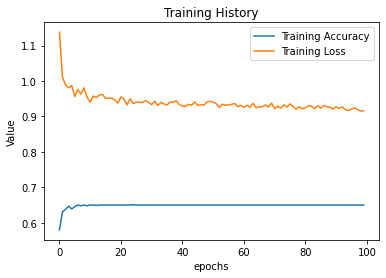

Initial training accuracy with preprocessing is:  0.5801782
Final training accuracy with preprocessing is:  0.65033406
Initial training loss with preprocessing is:  1.1374031578777628
Final training loss with preprocessing is:  0.9161267303809822


In [91]:
#Plotting model history
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['loss'])
plt.legend(['Training Accuracy', 'Training Loss'])
plt.title('Training History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial training accuracy with preprocessing is: ", cnn_history.history['acc'][0])
print("Final training accuracy with preprocessing is: ", cnn_history.history['acc'][-1])

print("Initial training loss with preprocessing is: ", cnn_history.history['loss'][0])
print("Final training loss with preprocessing is: ", cnn_history.history['loss'][-1])

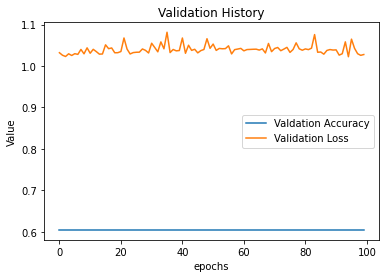

Initial Validation accuracy with preprocessing is:  0.60444444
Final Validation accuracy with preprocessing is:  0.60444444
Initial Validation loss with preprocessing is:  1.0319379064771863
Final Validation loss with preprocessing is:  1.0276036643981934


In [92]:
#Plotting model history
plt.plot(cnn_history.history['val_acc'])
plt.plot(cnn_history.history['val_loss'])
plt.legend(['Valdation Accuracy', 'Validation Loss'])
plt.title('Validation History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial Validation accuracy with preprocessing is: ", cnn_history.history['val_acc'][0])
print("Final Validation accuracy with preprocessing is: ", cnn_history.history['val_acc'][-1])

print("Initial Validation loss with preprocessing is: ", cnn_history.history['val_loss'][0])
print("Final Validation loss with preprocessing is: ", cnn_history.history['val_loss'][-1])

In [93]:
# #Plotting model history
# plt.plot(cnn_history.history['val_acc'])
# plt.plot(cnn_history.history['val_loss'])
# plt.legend(['Valdation Accuracy', 'Validation Loss'])
# plt.title('Validation History')
# plt.ylabel('Value')
# plt.xlabel('epochs')
# plt.show()
# print("Initial Validation accuracy is: ", cnn_history.history['val_acc'][0])
# print("Final Validation accuracy is: ", cnn_history.history['val_acc'][-1])

# print("Initial Validation loss is: ", cnn_history.history['val_loss'][0])
# print("Final Validation loss is: ", cnn_history.history['val_loss'][-1])

### Feature Extraction Model

In [94]:
inp_shape = (dims_lstm_1, dims_lstm_2)
ip = tf.keras.Input(shape = inp_shape)
conv1 = tf.keras.layers.Conv1D(32, 3,)(ip)
# rel1 = tf.keras.layers.LeakyReLU()(conv1)
maxpool1 = tf.keras.layers.MaxPooling1D()(conv1)
skip1 = maxpool1
conv2 = tf.keras.layers.Conv1D(32, 3,)(maxpool1)
conv2 = tf.keras.layers.ZeroPadding1D(padding=1)(conv2)
# rel2 = tf.keras.layers.LeakyReLU()(conv2)
maxpool2 = tf.keras.layers.MaxPooling1D()(conv2)
maxpool2 = tf.keras.layers.ZeroPadding1D(padding=(44,43))(maxpool2)
skip2 = maxpool2
conv3 = tf.keras.layers.Conv1D(32, 3,)(maxpool2)
conv3 = tf.keras.layers.ZeroPadding1D(padding=1)(conv3)
conv4 = tf.keras.layers.Conv1D(32, 3,)(conv3)
conv4 = tf.keras.layers.ZeroPadding1D(padding=1)(conv4)
conv5 = tf.keras.layers.Conv1D(32, 3,)(conv4)
conv5 = tf.keras.layers.ZeroPadding1D(padding=1)(conv5)
maxpool5 = tf.keras.layers.MaxPooling1D()(conv5)
maxpool5 = tf.keras.layers.ZeroPadding1D(padding=(44, 43))(maxpool5)
addlayer1 = tf.keras.layers.Add()([skip1, skip2, maxpool5])

# lstm = tf.keras.layers.LSTM(16, return_sequences=True)(ip)
flatten = tf.keras.layers.Flatten()(addlayer1)
dense1 = tf.keras.layers.Dense(units = 32, kernel_initializer = 'random_normal')(flatten)
# leakyRelu = tf.keras.layers.LeakyReLU()(dense1)
# drop1 = tf.keras.layers.Dropout(.4)(dense1)
dense2 = tf.keras.layers.Dense(units = 16, kernel_initializer = 'random_normal')(dense1)
# leakyRelu2 = tf.keras.layers.LeakyReLU()(dense2)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
out = tf.keras.layers.Dense(num_classes, activation = 'softmax')(drop2)

ftExtract = tf.keras.Model(inputs = ip, outputs = out)
ftExtract.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 351, 61)]    0                                            
__________________________________________________________________________________________________
conv1d_27 (Conv1D)              (None, 349, 32)      5888        input_11[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_15 (MaxPooling1D) (None, 174, 32)      0           conv1d_27[0][0]                  
__________________________________________________________________________________________________
conv1d_28 (Conv1D)              (None, 172, 32)      3104        max_pooling1d_15[0][0]           
____________________________________________________________________________________________

In [95]:
# Compiling the model
fte_earlystop = EarlyStopping(patience = 15, min_delta = 0.001, monitor = 'val_acc')

path = 'fte_checkpoint/checkpoint_{epoch:02d}';
fte_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                                 
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

ftExtract.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [96]:
ftExtract_history = ftExtract.fit(x_train_cnn, y_train_cnn,
                        validation_data = (x_test_cnn, y_test_cnn),
#                         steps_per_epoch= 449,
                        batch_size = 32,
                        epochs = 100,
                        callbacks = [fte_checkpoint],
                    ) #Fitting the model

Train on 898 samples, validate on 225 samples
Epoch 1/100
896/898 [============================>.] - ETA: 0s - loss: 1.0414 - acc: 0.6440
Epoch 00001: val_acc improved from -inf to 0.60444, saving model to fte_checkpoint/checkpoint_01
898/898 [==============================] - 5s 6ms/sample - loss: 1.0446 - acc: 0.6425 - val_loss: 1.0317 - val_acc: 0.6044
Epoch 2/100
896/898 [============================>.] - ETA: 0s - loss: 0.9814 - acc: 0.6328
Epoch 00002: val_acc did not improve from 0.60444
898/898 [==============================] - 3s 4ms/sample - loss: 0.9800 - acc: 0.6336 - val_loss: 1.0509 - val_acc: 0.6044
Epoch 3/100
896/898 [============================>.] - ETA: 0s - loss: 0.9534 - acc: 0.6507
Epoch 00003: val_acc did not improve from 0.60444
898/898 [==============================] - 3s 3ms/sample - loss: 0.9538 - acc: 0.6503 - val_loss: 1.0356 - val_acc: 0.6044
Epoch 4/100
896/898 [============================>.] - ETA: 0s - loss: 0.9638 - acc: 0.6507
Epoch 00004: val_acc

In [101]:
tf.keras.utils.plot_model(ftExtract)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


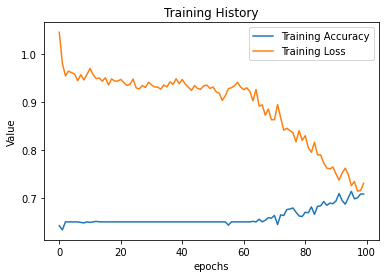

Initial training accuracy with preprocessing is:  0.64253896
Final training accuracy with preprocessing is:  0.7082405
Initial training loss with preprocessing is:  1.0446460108980038
Final training loss with preprocessing is:  0.7305026109473477


In [100]:
#Plotting model history
plt.plot(ftExtract_history.history['acc'])
plt.plot(ftExtract_history.history['loss'])
plt.legend(['Training Accuracy', 'Training Loss'])
plt.title('Training History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial training accuracy with preprocessing is: ", ftExtract_history.history['acc'][0])
print("Final training accuracy with preprocessing is: ", ftExtract_history.history['acc'][-1])

print("Initial training loss with preprocessing is: ", ftExtract_history.history['loss'][0])
print("Final training loss with preprocessing is: ", ftExtract_history.history['loss'][-1])

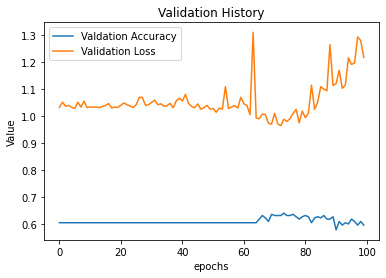

Initial Validation accuracy with preprocessing is:  0.60444444
Final Validation accuracy with preprocessing is:  0.59555554
Initial Validation loss with preprocessing is:  1.0316880893707276
Final Validation loss with preprocessing is:  1.2166440386242336


In [99]:
#Plotting model history
plt.plot(ftExtract_history.history['val_acc'])
plt.plot(ftExtract_history.history['val_loss'])
plt.legend(['Valdation Accuracy', 'Validation Loss'])
plt.title('Validation History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial Validation accuracy with preprocessing is: ", ftExtract_history.history['val_acc'][0])
print("Final Validation accuracy with preprocessing is: ", ftExtract_history.history['val_acc'][-1])

print("Initial Validation loss with preprocessing is: ", ftExtract_history.history['val_loss'][0])
print("Final Validation loss with preprocessing is: ", ftExtract_history.history['val_loss'][-1])

## Training for go/no-go

In [ ]:
#Creating dataset
datasetgonogo = main_dataset.copy()
print(datasetgonogo.shape)

unwanted_events_gonogo = [9, 10, 3, 6, 7, 8, 11, 1, 5]

for e in unwanted_events_gonogo:
    datasetgonogo = datasetgonogo[datasetgonogo[:, -1]!=e]

print(datasetgonogo.shape)

xgonogo = datasetgonogo[:, :-1]
ygonogo = datasetgonogo[:, -1]
print(xgonogo.shape)
print(ygonogo.shape)
print(list(set(ygonogo)))

permutations = np.random.permutation(len(xgonogo))
xgonogo = xgonogo[permutations]
ygonogo = ygonogo[permutations]

(1875, 21412)
(600, 21412)
(600, 21411)
(600,)
[2.0, 4.0]


In [ ]:
#Encoding y
dict = {2.0: 0, 4.0: 1}

for i in range(len(ygonogo)):
    ygonogo[i] = dict[ygonogo[i]]

print(list(set(ygonogo)))

[0.0, 1.0]


In [ ]:
num_classes = 2
ygonogo = tf.keras.utils.to_categorical(ygonogo, num_classes)
ygonogo[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
train_test_split = int(0.8 * len(xgonogo))
print(train_test_split)

xgonogo_train_mlp = xgonogo[:train_test_split]
ygonogo_train_mlp = ygonogo[:train_test_split]

xgonogo_test_mlp = xgonogo[train_test_split:]
ygonogo_test_mlp = ygonogo[train_test_split:]

xgonogo_train_mlp.shape

480


(480, 21411)

In [ ]:
def get_cyclic_generator(features, labels, batch_size = 1):
  while True:
    for n in range(features.shape[0]//batch_size):
      yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = labels[permuted]

In [ ]:
train_batch_size = 32
train_cyclic_generator_mlp_gonogo = get_cyclic_generator(xgonogo_train_mlp, ygonogo_train_mlp, batch_size = train_batch_size)
# test_cyclic_generator = get_cyclic_generator(x_test, y_test, batch_size = train_batch_size)

In [ ]:
#Creating model architecture
inp_shape = (dims_ip, )
ip = tf.keras.Input(shape = inp_shape)
dense1 = tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_initializer = 'random_normal')(ip)
drop = tf.keras.layers.Dropout(.4)(dense1)
dense2 = tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer = 'random_normal')(drop)
drop2 = tf.keras.layers.Dropout(.4)(dense2)
out = tf.keras.layers.Dense(num_classes, activation = 'softmax')(drop2)

mlp_gonogo = tf.keras.Model(inputs = ip, outputs = out)
mlp_gonogo.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 21411)]           0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                685184    
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 34        
Total params: 685,746
Trainable params: 685,746
Non-trainable params: 0
_____________________________________________________

In [ ]:
# Compiling the model
mlp_gonogo_earlystop = EarlyStopping(patience = 10, min_delta = 0.001, monitor = 'val_acc')

path = 'mlp_gonogo_checkpoint/checkpoint_{epoch:02d}';
mlp_gonogo_checkpoint = ModelCheckpoint(filepath = path,
                            verbose = 1,
                            monitor = 'val_acc',
                            save_freq = 'epoch',
                            save_best_only = True,
                            save_weights_only = True)

mlp_gonogo.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [ ]:
# historygonogo = modelgonogo.fit(xgonogo, ygonogo, epochs=300, callbacks = [earlystop, model_checkpoint]) #plotting the model

mlp_gonogo_history = mlp_gonogo.fit(train_cyclic_generator_mlp_gonogo,
                        validation_data = (xgonogo_test_mlp, ygonogo_test_mlp),
                        steps_per_epoch= 449,
                        epochs = 50,
                        callbacks = [mlp_gonogo_earlystop, mlp_gonogo_checkpoint]) #Fitting the model

  ...
    to  
  ['...']
Train for 449 steps, validate on 120 samples
Epoch 1/50
447/449 [============================>.] - ETA: 0s - loss: 0.5398 - acc: 0.7902
Epoch 00001: val_acc improved from -inf to 0.83333, saving model to mlp_gonogo_checkpoint/checkpoint_01
449/449 [==============================] - 8s 17ms/step - loss: 0.5393 - acc: 0.7906 - val_loss: 0.4597 - val_acc: 0.8333
Epoch 2/50
446/449 [============================>.] - ETA: 0s - loss: 0.5156 - acc: 0.7922
Epoch 00002: val_acc did not improve from 0.83333
449/449 [==============================] - 6s 13ms/step - loss: 0.5161 - acc: 0.7918 - val_loss: 0.4561 - val_acc: 0.8333
Epoch 3/50
448/449 [============================>.] - ETA: 0s - loss: 0.5159 - acc: 0.7911
Epoch 00003: val_acc did not improve from 0.83333
449/449 [==============================] - 6s 14ms/step - loss: 0.5155 - acc: 0.7914 - val_loss: 0.4582 - val_acc: 0.8333
Epoch 4/50
445/449 [============================>.] - ETA: 0s - loss: 0.5118 - acc: 0.7

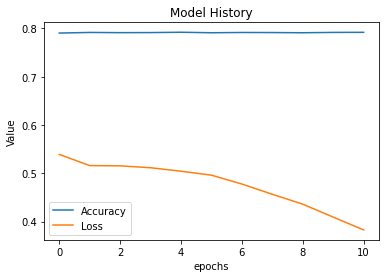

Initial accuracy is:  0.7905763
Final accuracy is:  0.79210746
Initial loss is:  0.5392751983783823
Final loss is:  0.3828980540711524


In [ ]:
#plotting model history
plt.plot(mlp_gonogo_history.history['acc'])
plt.plot(mlp_gonogo_history.history['loss'])
plt.legend(['Accuracy', 'Loss'])
plt.title('Model History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial accuracy is: ", mlp_gonogo_history.history['acc'][0])
print("Final accuracy is: ", mlp_gonogo_history.history['acc'][-1])

print("Initial loss is: ", mlp_gonogo_history.history['loss'][0])
print("Final loss is: ", mlp_gonogo_history.history['loss'][-1])

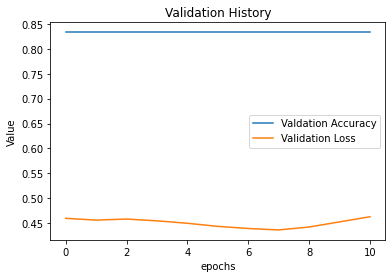

Initial Validation accuracy is:  0.8333333
Final Validation accuracy is:  0.8333333
Initial Validation loss is:  0.4596542636553446
Final Validation loss is:  0.4628682096799215


In [ ]:
#Plotting model history
plt.plot(mlp_gonogo_history.history['val_acc'])
plt.plot(mlp_gonogo_history.history['val_loss'])
plt.legend(['Valdation Accuracy', 'Validation Loss'])
plt.title('Validation History')
plt.ylabel('Value')
plt.xlabel('epochs')
plt.show()
print("Initial Validation accuracy is: ", mlp_gonogo_history.history['val_acc'][0])
print("Final Validation accuracy is: ", mlp_gonogo_history.history['val_acc'][-1])

print("Initial Validation loss is: ", mlp_gonogo_history.history['val_loss'][0])
print("Final Validation loss is: ", mlp_gonogo_history.history['val_loss'][-1])

In [ ]:
print(len(tf.config.experimental.list_physical_devices('GPU')))

1
